In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset
file_path = 'cognitive_data.csv'  # Update with the actual file path
data = pd.read_csv(file_path, encoding='latin1')

# Sort the data by the 'Name' column
sorted_data = data.sort_values(by='Name')

# Display only the specified columns
selected_columns = sorted_data[['Name', 'Time','Test Name', 'Case']]

# Configure Pandas to display the full result
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Remove width restrictions
pd.set_option('display.colheader_justify', 'center')  # Center align headers

# Print the complete result
print(selected_columns)


          Name              Time       Test Name Case
77     Alisa Ahlgren  25/01/2025 13:11    stroop   F 
72     Alisa Ahlgren  25/01/2025 13:06     2back   F 
73     Alisa Ahlgren  25/01/2025 14:46     2back   B 
74     Alisa Ahlgren  25/01/2025 13:09   flanker   F 
75     Alisa Ahlgren  25/01/2025 14:48   flanker   B 
76     Alisa Ahlgren  25/01/2025 14:49    stroop   B 
52      Chia-Min Lai  07/12/2024 14:17    stroop   B 
53      Chia-Min Lai  07/12/2024 12:54    stroop   F 
17      Chia-Min Lai  07/12/2024 14:14     2back   B 
41      Chia-Min Lai  07/12/2024 14:16   flanker   B 
0       Chia-Min Lai  07/12/2024 12:49     2back   F 
38      Chia-Min Lai  07/12/2024 12:52   flanker   F 
86  Heidi Hirvilammi  20/01/2025 15:25     2back   B 
87  Heidi Hirvilammi  20/01/2025 16:52     2back   F 
88  Heidi Hirvilammi  20/01/2025 16:53   flanker   F 
91  Heidi Hirvilammi  20/01/2025 15:27   flanker   B 
92  Heidi Hirvilammi  20/01/2025 15:29    stroop   B 
93  Heidi Hirvilammi  20/01/

In [7]:
# Additional grouping by 'Test Name' and 'Case' to get overall averages across participants
overall_averages = data.groupby(['Test Name', 'Case']).agg({
    'Accuracy': ['mean', 'std'],
    'Average Response Time': ['mean', 'std'],
    'Inverse Efficiency Score': ['mean', 'std']
}).reset_index()


def calculate_and_format_averages(data):
    # Grouping and calculating mean and standard deviation
    overall_averages = data.groupby(['Test Name', 'Case']).agg({
        'Accuracy': ['mean', 'std'],
        'Average Response Time': ['mean', 'std'],
        'Inverse Efficiency Score': ['mean', 'std']
    }).reset_index()

    # Renaming columns for clarity
    overall_averages.columns = ['Test Name', 'Case',
        'Mean Accuracy', 'SD Accuracy',
        'Mean Response Time', 'SD Response Time',
        'Mean Inverse Efficiency', 'SD Inverse Efficiency']

    # Formatting mean and SD into a single column
    overall_averages['Accuracy (SD)'] = overall_averages.apply(
        lambda row: f"{row['Mean Accuracy']:.2f} ({row['SD Accuracy']:.2f})", axis=1
    )
    overall_averages['Response Time (SD)'] = overall_averages.apply(
        lambda row: f"{row['Mean Response Time']:.2f} ({row['SD Response Time']:.2f})", axis=1
    )
    overall_averages['Inverse Efficiency (SD)'] = overall_averages.apply(
        lambda row: f"{row['Mean Inverse Efficiency']:.2f} ({row['SD Inverse Efficiency']:.2f})", axis=1
    )

    # Selecting relevant columns to display
    formatted_averages = overall_averages[[
        'Test Name', 'Case',
        'Accuracy (SD)', 'Response Time (SD)', 'Inverse Efficiency (SD)'
    ]]

    return formatted_averages


original_averages = calculate_and_format_averages(data)
print("\nOverall Averages Across All Participants:")
print(original_averages)

def exclude_outliers_per_group(df, group_cols, column):
    filtered_dfs = []
    stats = []
    
    for group, group_data in df.groupby(group_cols):
        Q1 = group_data[column].quantile(0.25)
        Q3 = group_data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Append range stats
        stats.append({
            'Test Name': group[0],
            'Case': group[1],
            'Initial Min': group_data[column].min(),
            'Initial Max': group_data[column].max(),
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Filtered Min': group_data[(group_data[column] >= lower_bound)][column].min(),
            'Filtered Max': group_data[(group_data[column] <= upper_bound)][column].max(),
        })
        
        # Filter data
        filtered_dfs.append(group_data[(group_data[column] >= lower_bound) & (group_data[column] <= upper_bound)])
    
    filtered_df = pd.concat(filtered_dfs, ignore_index=True)
    stats_df = pd.DataFrame(stats)
    return filtered_df, stats_df

# Exclude outliers and gather statistics
filtered_data, stats = exclude_outliers_per_group(data, ['Test Name', 'Case'], 'Inverse Efficiency Score')

# Calculate average metrics after excluding outliers

filtered_data.groupby(['Test Name', 'Case']).agg({
    'Accuracy': ['mean', 'std'],
    'Average Response Time': ['mean', 'std'],
    'Inverse Efficiency Score': ['mean', 'std']
}).reset_index()


filtered_averages = calculate_and_format_averages(filtered_data)
print("\nOverall Averages Across All Participants without outliers:")
print(filtered_averages)


Overall Averages Across All Participants:
  Test Name Case Accuracy (SD)  Response Time (SD) Inverse Efficiency (SD)
0     2back   B    90.89 (9.34)  2310.34 (269.14)         25.83 (5.20)    
1     2back   F    91.61 (7.91)  2414.54 (207.77)         26.59 (3.60)    
2   flanker   B   89.25 (19.03)   802.25 (183.71)        11.83 (14.64)    
3   flanker   F   90.00 (11.59)   785.19 (133.63)          9.07 (3.11)    
4    stroop   B    96.25 (5.63)  1003.62 (170.38)         10.51 (2.19)    
5    stroop   F   92.19 (11.69)  1053.09 (217.88)         11.87 (4.06)    

Overall Averages Across All Participants without outliers:
  Test Name Case Accuracy (SD)  Response Time (SD) Inverse Efficiency (SD)
0     2back   B    93.88 (4.02)  2277.00 (271.99)        24.27 (2.91)     
1     2back   F    91.61 (7.91)  2414.54 (207.77)        26.59 (3.60)     
2   flanker   B    93.87 (4.75)   767.04 (122.10)         8.18 (1.29)     
3   flanker   F    93.71 (5.14)   752.87 (107.30)         8.06 (1.26)   

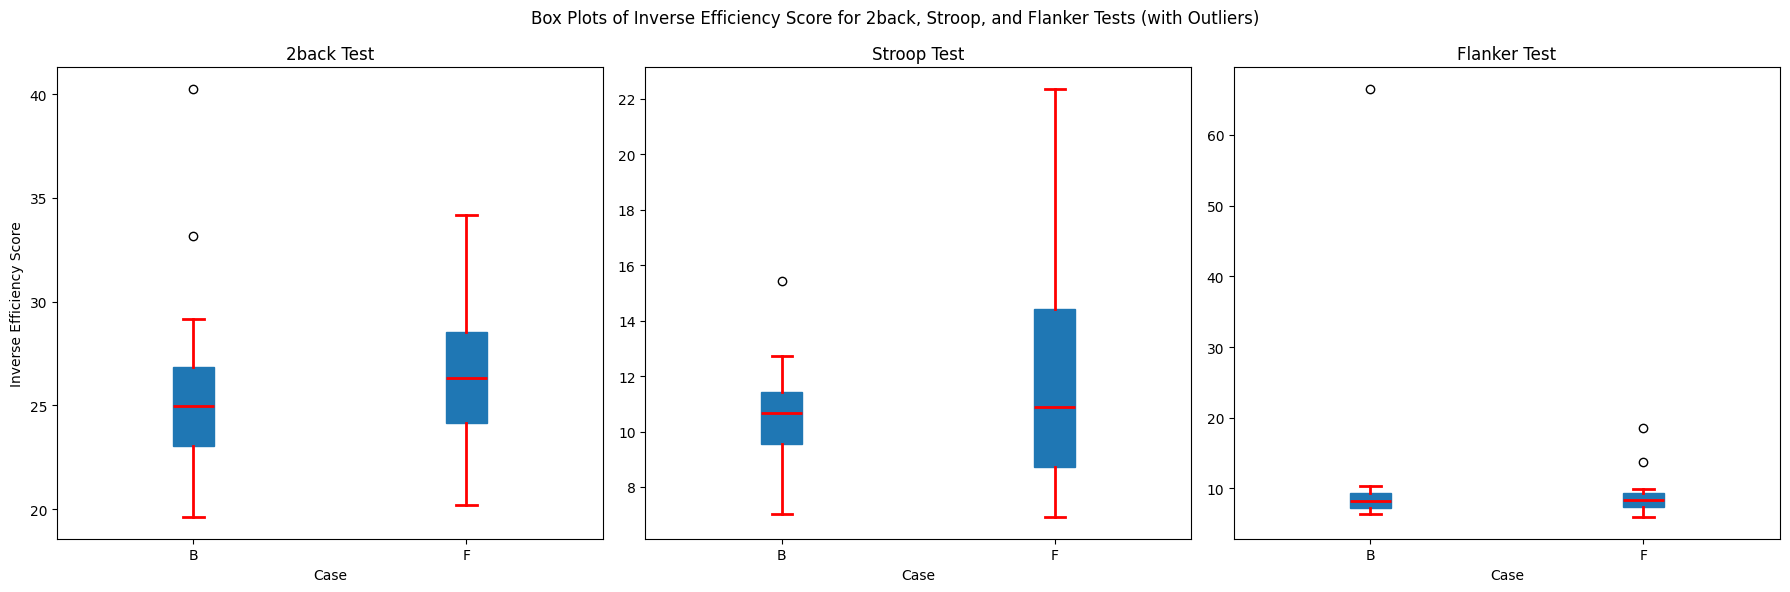

In [8]:
tests = ['2back', 'stroop', 'flanker']

# Create a figure with subplots for each test
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)  # Set sharey=False for independent y-axes

# Plot settings for each test
test_titles = ['2back Test', 'Stroop Test', 'Flanker Test']
for i, test in enumerate(tests):
    test_data = data[data['Test Name'] == test]
    # Create the box plot with outliers included
    boxplot = test_data.boxplot(
        column='Inverse Efficiency Score',
        by='Case',
        grid=False,
        patch_artist=True,
        ax=axes[i],
        showfliers=True  # Include outliers
    )
    
    # Customize the median line
    for line in axes[i].lines:
        if line.get_linestyle() == '-':  # Median lines are solid
            line.set_color('red')  # Set median line color
            line.set_linewidth(2)  # Set median line width

    axes[i].set_title(test_titles[i])
    axes[i].set_xlabel('Case')
    if i == 0:
        axes[i].set_ylabel('Inverse Efficiency Score')

# Overall adjustments
fig.suptitle('Box Plots of Inverse Efficiency Score for 2back, Stroop, and Flanker Tests (with Outliers)')
plt.tight_layout()

# Show the plot
plt.show()

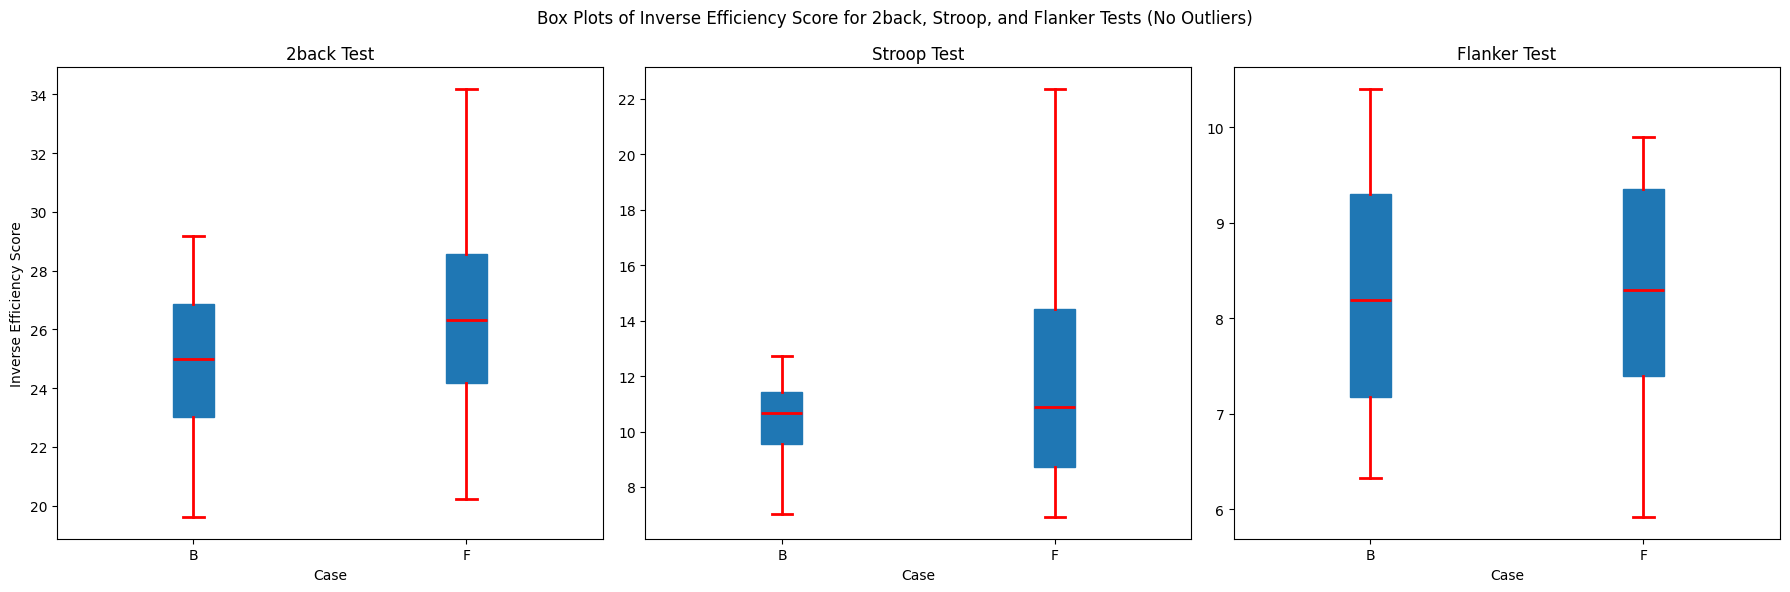

In [9]:
# Create a new figure for the box plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False)  # sharey=False allows independent y-axes

# Plot settings for each test
for i, test in enumerate(tests):
    test_data = data[data['Test Name'] == test]
    # Create the box plot
    test_data.boxplot(
        column='Inverse Efficiency Score',
        by='Case',
        grid=False,
        patch_artist=True,
        ax=axes[i],
        showfliers=False  # Exclude outliers
    )

    for line in axes[i].lines:
        if line.get_linestyle() == '-':  # Median lines are solid
            line.set_color('red')  # Set median line color
            line.set_linewidth(2)  # Set median line width

    axes[i].set_title(test_titles[i])
    axes[i].set_xlabel('Case')
    if i == 0:
        axes[i].set_ylabel('Inverse Efficiency Score')

# Overall adjustments
fig.suptitle('Box Plots of Inverse Efficiency Score for 2back, Stroop, and Flanker Tests (No Outliers)')
plt.tight_layout()

# Show the plot
plt.show()


In [10]:
import pandas as pd
from scipy.stats import ttest_rel

comparison_results = []

# Group by Test Name
for test_name, test_group in data.groupby('Test Name'):
    # Filter data for Case B and Case F
    case_b = test_group[test_group['Case'] == 'B']
    case_f = test_group[test_group['Case'] == 'F']
    
    # Merge Case B and Case F data on the Name column
    merged_data = pd.merge(
        case_b[['Name', 'Inverse Efficiency Score']],
        case_f[['Name', 'Inverse Efficiency Score']],
        on='Name',
        suffixes=('_B', '_F')
    )
    
    # Compare Case B and Case F scores
    merged_data['Better_in_B'] = merged_data['Inverse Efficiency Score_B'] < merged_data['Inverse Efficiency Score_F']
    
    # Count how many people performed better in Case B
    better_in_B = merged_data['Better_in_B'].sum()
    total_people = merged_data['Name'].nunique()
    
    # Compute t-statistics and p-value for paired samples
    t_stat, p_value = ttest_rel(
        merged_data['Inverse Efficiency Score_B'], 
        merged_data['Inverse Efficiency Score_F']
    )
    # Append results
    comparison_results.append({
        'Test Name': test_name,
        'People Better in Case B': better_in_B,
        'Total People': total_people,
        'Percentage Better in Case B': (better_in_B / total_people) * 100,
        'T-Statistic': t_stat,
        'P-Value': p_value
    })

# Convert results to a DataFrame for better presentation
comparison_df = pd.DataFrame(comparison_results)

print(comparison_df)


  Test Name  People Better in Case B  Total People  \
0     2back            10                  16        
1   flanker             9                  16        
2    stroop            10                  16        

   Percentage Better in Case B  T-Statistic   P-Value  
0             62.50             -0.422402    0.678724  
1             56.25              0.724567    0.479868  
2             62.50             -1.341234    0.199801  


Since the p-value is greater than 0.05. There is not enough statistical evidence to conclude that the IES in frequency tests are significantly different from IES in baseline tests.